<a href="https://colab.research.google.com/github/amitthakur2013/Coursera_Capstone/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means clustering**

K-means clustering on a randomly generated data set

In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported!')

Libraries imported!


In [2]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')

Datapoints defined!


In [3]:
colors_map=np.array(['b','r'])
def assign_members(x1,x2, centers):
  compare_to_first_center=np.sqrt(np.square(np.array(x1)-centers[0][0]) + np.square(np.array(x2)-centers[0][1]))
  compare_to_second_center=np.sqrt(np.square(np.array(x1)-centers[1][0])+ np.square(np.array(x2)-centers[1][0]))
  class_of_points=compare_to_first_center > compare_to_second_center
  colors=colors_map[class_of_points +1 -1]
  return colors,class_of_points
print('assign_members function defined!')

assign_members function defined!


In [4]:
#Define a function that updates the centroid of each cluster

def update_centers(x1, x2, class_of_points):
  center1=[np.mean(np.array(x1)[~class_of_points]),np.mean(np.array(x2)[~class_of_points])]
  center2=[np.mean(np.array(x1)[class_of_points]),np.mean(np.array(x2)[class_of_points])]
  return [center1, center2]
print('update_centers function defined!')

update_centers function defined!


In [5]:
#Define a function that plots the data points along with the cluster centroids
def plot_points(centroids=None,colors='g', figure_title=None):
  #plot the figure
  fig=plt.figure(figsize=(15, 10)) #create a figure object
  ax=fig.add_subplot(111)
  
  centroid_colors = ['bx', 'rx']
  if centroids:
    for i,centroid in enumerate(centroids):
      ax.plot(centroid[0], centroid[1],centroid_colors[i], markeredgewidth=5,markersize=20)
  plt.scatter(x1,x2,s=500,c=colors)
  
  #define the ticks
  xticks=np.linspace(-6, 8, 15, endpoint=True)
  yticks=np.linspace(-6,6,13, endpoint=True)
  
  #fix the horizontal axis
  ax.set_xticks(xticks)
  ax.set_yticks(yticks)
  
  #add tick labels
  xlabels=xticks
  ax.set_xticklabels(xlabels)
  
  ylabels=yticks
  ax.set_yticklabels(ylabels)
  
  #style the ticks
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
  #add labels to axes
  ax.set_xlabel('x1', fontsize=20)
  ax.set_ylabel('x2', fontsize=20)
  
  ax.set_title(figure_title, fontsize=24)
  
  plt.show()
print('plot_point ')

plot_point 


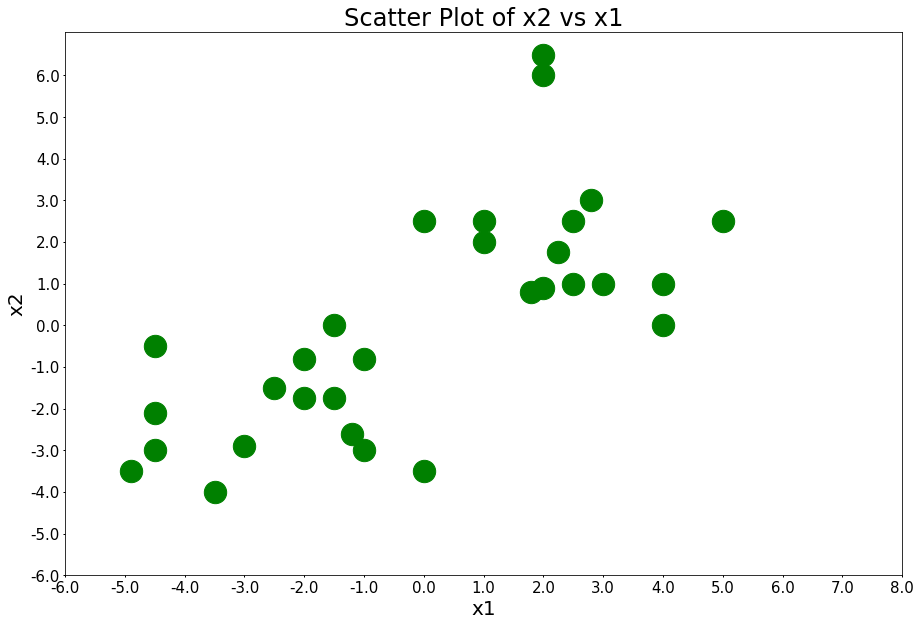

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

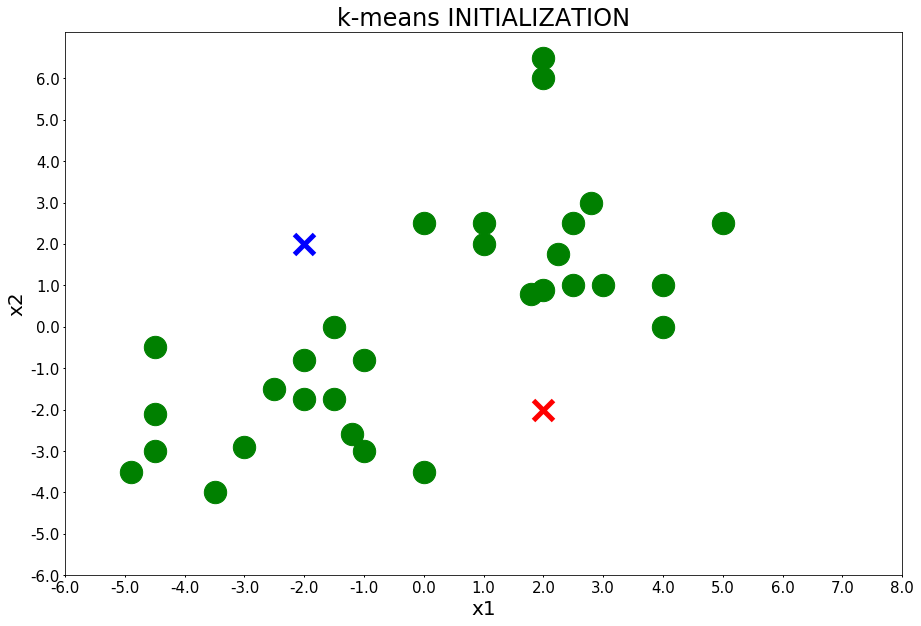

In [7]:
centers=[[-2, 2], [2, -2]]
plot_points(centers, figure_title="k-means INITIALIZATION")

**Run k-means (4 iterations only)**

In [0]:
np.random.seed(0)

In [0]:
X, y= make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1,1]], cluster_std=0.9)

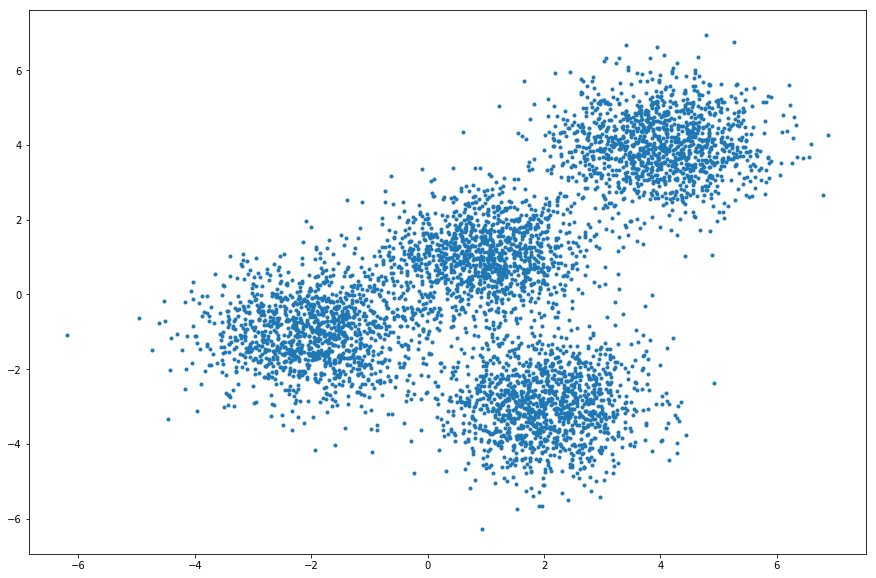

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0],X[:, 1], marker=".")

In [0]:
k_means=KMeans(init="k-means++", n_clusters=4, n_init=12)

In [16]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
k_means_labels=k_means.labels_
k_means_labels

array([3, 3, 0, ..., 3, 0, 0], dtype=int32)

In [18]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 2.01712402, -2.98474324],
       [ 0.97468147,  1.02839633],
       [ 4.00130768,  3.9898029 ],
       [-1.99025056, -1.06295457]])

**Let us visualize the Reslting clusters**

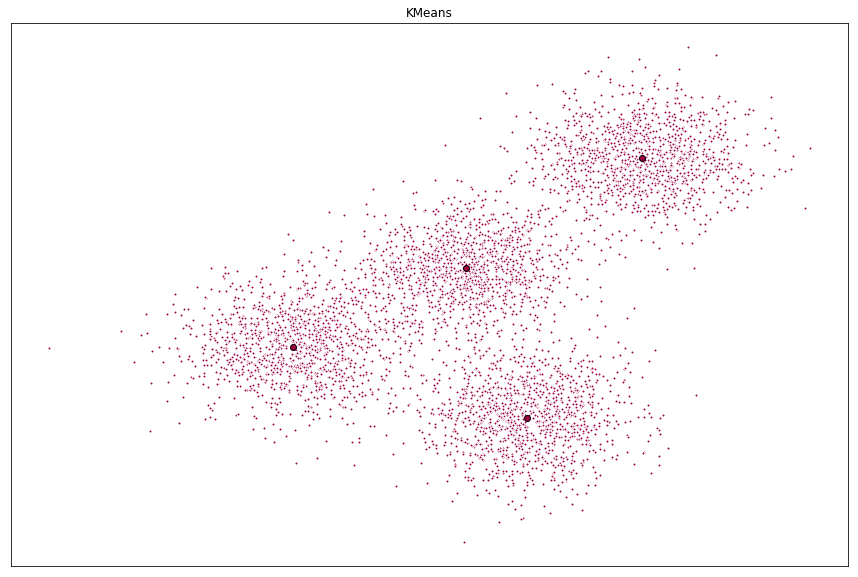

In [19]:
fig=plt.figure(figsize=(15,10))
colors=plt.cm.Spectral(np.linspace(0,1,len(k_means_labels)))
ax=fig.add_subplot(111)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
  my_members=(k_means_labels == k)
  cluster_center=k_means_cluster_centers[k]
  ax.plot(X[my_members, 0], X[my_members, 1],'w', markerfacecolor=col, marker='.')
  ax.plot(cluster_center[0], cluster_center[1],'o',markerfacecolor=col, markeredgecolor='k',markersize=6)
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()  

**Using k-means for Customer Segmentation**

In [20]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


In [22]:
customers_df=pd.read_csv('customer_segmentation.csv')
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [23]:
df=customers_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [24]:
from sklearn.preprocessing import StandardScaler

X=df.values[:,1:]
X=np.nan_to_num(X)
cluster_dataset= StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [25]:
num_clusters= 3
k_means=KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels=k_means.labels_

print(labels)

[1 0 2 1 0 0 1 1 1 0 2 1 1 1 2 1 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 0 2 1 1 1 2
 2 1 0 2 0 1 0 1 0 1 1 1 1 0 0 2 1 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 0 1 1 2 0 1 0 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2
 1 1 1 0 2 1 1 1 1 0 2 2 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 2 0 2 1 1 0 2
 0 1 1 1 1 1 0 1 2 1 1 1 0 0 1 0 1 2 1 1 2 1 0 1 2 1 1 1 1 1 2 2 0 1 1 2 0
 1 1 1 1 0 1 1 2 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 2 1 2 1
 1 1 0 1 2 0 2 1 0 1 1 2 1 1 1 1 2 2 2 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 2 1 1
 2 1 2 0 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 1 0 2
 1 1 2 1 0 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 2 1 2 1 1 1 0 0 1
 2 1 0 2 2 1 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 1 1 1 2 1 1 2 2
 0 1 1 1 1 1 2 2 1 0 2 0 1 1 2 1 1 0 0 1 2 1 1 0 1 2 1 0 1 1 1 0 1 1 1 1 0
 1 2 1 1 1 1 0 2 1 1 0 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1
 2 1 1 1 1 1 0 2 2 1 0 1 

In [26]:
df["Labels"]= labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [27]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
